In [1]:
# Needed for Markdown output from Python cells
from IPython.display import Markdown as md

import os
import fdsreader

# Setting up and fds simulation

In this part we will guide you on how to set up your input file for a FDS simulation. A propane fire within a room will be simulated. The room is pictured in figure . In the middel of the room there will be an object with dimensions 1m x1m x 0.5m, the heat release rate of the fire is 600 kW/$m^2$

:::{figure-md} Geometry and dimensions of the room
<img src="./figs/Room_dimensions.png" width="60%">

Geometry and dimensions of the room.
:::

First you should make a new folder. In this folder you will create the input file and all the generated output files will also be located in this folder. Create and empty txt file in this document. You could use for example atom to create your txt file. Name the file and now change the extension of the file to fds instead of txt. 

## Step 1: setting up the input file

Now you will start creating the input file. The first line of your file should be the header line. 

&HEAD CHID='Job_1', TITLE='Our first FDS simulation' /

* CHID: is the character ID. This is the string used to tag the output files. 
* TITLE: is a descriptive text of your simulation.

At the end of the file, the following line must be added. 

&TAIL/ 

All other input parameters and set-ups come between the first and the last line. 

## Step 2: Setting up the computational domain

In the third step the domain of the simulation is set-up. This is done by creating a mesh. The domain is specified by its coordinates XB = x, x',y,y',z,z', see figure and by the amount of cells the x,y,z directions are deivded in IJK = n(x), n(y), n(z).

&MESH XB=0,2,0,4,0,2.5, IJK=20,40,25/

:::{figure-md} XB coordinate definition in fds
<img src="./figs/Coordinates.png" width="20%">

XB coordinate definition in fds.
:::

The domain for this example is vizualized in figure .

:::{figure-md} Geometry and dimensions of the room
<img src="./figs/grid.png" width="40%">

Vizualisation of the domain.
:::

## Step 3: duration of the simulation 

In the input file it should be specified how long the simulation is supposed to run. This can be done with the following statement, the simulation time is specified in seconds:

`&TIME T_END = 60. /`

Additionlly, the rate at which the output files are written should be speciied. This can be done with the following statement, where NFRAMES indicate how many outputfiles will be written during the simulation.  

`&DUMP NFRAMES=60 /`


## Step 4: Model openings 

The room has one door, this needs to be moddeled as an opening. The VENT command can be used to model openings, XB specifies the coordinates of the opening. 

&VENT XB=0.5,1.5,4,4,0,2, surf_ID='OPEN'/

The geometry for this example is showen in figure


:::{figure-md} Geometry and dimensions of the room
<img src="./figs/Door.png" width="15%">

The geometry of the room.
:::

**Hint** The implemented geometry can be check in the following way: 
* Save the fds input file 
* Let it run for a few seconds (running the fds file can be done from the command line, with fds filename.fds)
* Open the smokeview output file and check the geometry

## Step 5: Model the combustion 

This is done in 2 parts. First the fuel needs to be defined. A list with pre-defined fuels in fds can be found in the FDS user manual. In this example propane will be used as reaction fuel. The command for the input file is: 

&REAC FUEL = 'PROPANE'

Next, the object that is burning needs to be defined. This will be done by using the following command. 

&OBST XB=0.5,1.5,1.5,2.5,0,0.5, SURF_ID='Fire'/

* XB specifies the coordinates of the burning obstacle 
* SURF_ID specifies which boundary conditions should be added to the surface. The input file needs to contain a line which specifies this boundary conditions. If not all surface of the obstacle have the same properties, several surface idea's can be defined. 

In this example the fire is described by fixing the heat release rate of the obstacle. In the example the heat release rate will be fixed to 600 kW/$m^2$.

&SURF ID = 'Fire', HRRPUA = 600/



## STEP 6: Output

In this example the temperature of the air near the ceiling will be measured/studied as output parameter. There are 2 main ways to do this. The first one is over a device and the second one is by a slice. 

**Devices**

Devices in fds are used to include e.g. thermocouples, sprinklers, ... in the simulation. Every device gets several properties assigned.
* Every device needs to be assigned a point or a span of the computational domain. This is specified by the coordinates XYZ. 
* Every device gets an ID. This is a label to identify the device in the output files. 
* A device can have a specified QUANTITY, which tells FDS what should be recorded. 

The command for the input file is: 

&DEVC ID='Air Temperature', XYZ = 1,2,1.5, QUANTITY = 'TEMPERATURE'

With this line fds will record the temperature at the point x=1, y=2, z=2. 

**Slices**

A slice file allows to record a gas phase quantity at a part of the domain. In this example the temperature at the plane y=2 will be chosen as property to record. 
* The position of the slice file can either be specified by XB or by PBX, PBY, PBZ. Where the latest, allow to indicate a plane, e.g. PBY = 2, indicates the plane y=2. 
* Similar to the device, the quantity that needs to be recorded needs to be specified.

The command for the input file is:

&SLCF PBY=2, QUANTITY='TEMPERATURE'

The input file is not completed. The simulation can now be ran over the terminal with: fds filename.fds.

## Step 7: Reading the output


The simulation has generated some output data. In this section it will be introduced, where you can find this data and how this can be read out. 

### 7.1 Smokeview
The input file contained a slice file, this recorded the temperature over the plain y=2 during the simulation. The recorded temperature can be displayed in smokeview. First, the smokeview file needs to be opened, this can be done over the commandline by: smokeview filename.smv. To display the slice file, follow the following steps
* Press right mouse button
* Press Load/Unload
* Press Slice
* Press Temperature
* Press y=2.0
The slice file is now displayed, you can play with the setting of smokeview to change e.g. the framespeed. 

## 7.2 Reading out the device file 
The temperature measured by the device is stored in a csv file, filename_devc.csv. The data in the csv file can be read out and plotted with a programm of your preference. We would like to encourage you to read out the data and plot the data with Python. Bellow you can find the example for reading out the data with python. 


In [2]:
File_location = '../../../../data/fds_tutorial/tutorial_01/rundir/out_tutorial_01_devc.csv'

import pandas as pd
Temperature_devc = pd.read_csv(File_location, names=['Time', 'Temperature'], skiprows=[0,1])

In the above code the data is read in using the pandas package. Pandas is a powerfull package from python for handling csv or excell files, more info on the package can be found here: . 

Now that the data has been imported, the plots can be generated. In order to do so the matplotlib.pyplot libary from python will be used.

Text(0, 0.5, 'Temperature (˚C)')

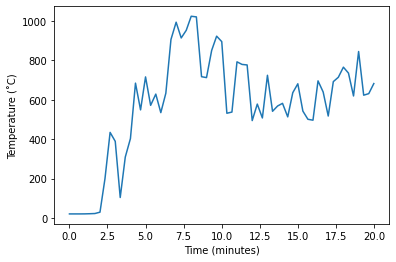

In [3]:
import matplotlib.pyplot as plt 

plt.figure()
plt.plot(Temperature_devc['Time'], Temperature_devc['Temperature'])
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (˚C)')

### 7.3 fds reader 

In [1]:
import fdsreader

Simulation = fdsreader.Simulation('../../../../data/fds_tutorial/tutorial_01/rundir/')



## Extra exercises 

In this section you can find some exercises to make yourself more familiar with setting up an fds file. 

### Exercise 1: extend the current input file 
* Measure the temperature with a thermocouple on the line x=1, y = 1.5 every 0.5 cm in the z-direction. Make a plot with displaying the temperature measurements of all the thermocouples in the simulation. 
* Add a window to the room. The windows center should be located at x=1, y=2, z = 0. The window is 1m by 1m. 
* Measure the temperature at the plane x=1.

### Exercise 2: setting up a new simulation
Concider a one room garden house. The garden house has the following properties: 
* Dimensions: 3m x 3m x2m 
* The garden house has a door of 1.5 m height and 2m width
* At both sides the garden house has a window in the middle of the wall with a width of 1m. The height of the windows is 0.5 m (located between 1m and 1.5m)
* In the left back corner of the garden house is a object (dimensions 0.5 m x 0.5 m x 0.2 m), the object burns like acetone
* Calculate the temperature at the planes (in x and y direction) slicing through the middle of the object 
* Install thermocouples with 0.2 m distance in a ray above the burning object. Starting 0.2 m above the object untill the ceiling. Plot the temperatures measured by these thermocouples. 
* Use a mesh with 0.1 m x 0.1 m x 0.1 m cubes for the simulation

